<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Notebook-Setup" data-toc-modified-id="Notebook-Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Notebook Setup</a></span></li><li><span><a href="#PUMA-:-Public-Use-Microdata-Area" data-toc-modified-id="PUMA-:-Public-Use-Microdata-Area-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PUMA : Public Use Microdata Area</a></span><ul class="toc-item"><li><span><a href="#Download-the-NYC-Public-Use-Microdata-Areas-(PUMA)-geometry-fron-the-NYC-Open-Data-API-and-read-it-in-with-geopandas" data-toc-modified-id="Download-the-NYC-Public-Use-Microdata-Areas-(PUMA)-geometry-fron-the-NYC-Open-Data-API-and-read-it-in-with-geopandas-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download the NYC Public Use Microdata Areas (PUMA) geometry fron the NYC Open Data API and read it in with geopandas</a></span></li><li><span><a href="#Plot-the-PUMA-NYC-regions" data-toc-modified-id="Plot-the-PUMA-NYC-regions-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot the PUMA NYC regions</a></span></li></ul></li><li><span><a href="#American-Fact-Finder-data-on-percentage-of-houses-with-broadband-internet-access" data-toc-modified-id="American-Fact-Finder-data-on-percentage-of-houses-with-broadband-internet-access-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>American Fact Finder data on percentage of houses with broadband internet access</a></span><ul class="toc-item"><li><span><a href="#Get-data-with-American-Fact-Finder-(AFF)-API" data-toc-modified-id="Get-data-with-American-Fact-Finder-(AFF)-API-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Get data with American Fact Finder (AFF) API</a></span></li><li><span><a href="#Generate-a-feature-for-the-percentage-of-households-with-broadband-access" data-toc-modified-id="Generate-a-feature-for-the-percentage-of-households-with-broadband-access-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Generate a feature for the percentage of households with broadband access</a></span></li><li><span><a href="#Compare-it-with-the-AFF-published-&quot;Percentage-of-households-with-broadband-access&quot;" data-toc-modified-id="Compare-it-with-the-AFF-published-&quot;Percentage-of-households-with-broadband-access&quot;-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Compare it with the AFF published "Percentage of households with broadband access"</a></span></li></ul></li></ul></div>

## Notebook Setup

In [46]:
from __future__ import print_function, division

import urllib
import os, shutil
import zipfile
import re
import io

import requests
import json

import pandas as pd
import geopandas as gpd
import fiona
import shapely
import choroplethNYC as cp

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## PUMA : Public Use Microdata Area

### Download the NYC Public Use Microdata Areas (PUMA) geometry fron the NYC Open Data API and read it in with geopandas

In [8]:
url = "https://data.cityofnewyork.us/api/geospatial/cwiz-gcty?method=export&format=Shapefile"
fileName = "PUMA.gz"
urllib.request.urlretrieve(url, fileName);

path = os.getcwd()
oldFile = path + "/" + "PUMA.gz"
newFile = os.getenv("PUIDATA") + "PUMA.gz"
shutil.move(oldFile, newFile);

zip_ref = zipfile.ZipFile(newFile, 'r')
zip_ref.extractall(os.getenv("PUIDATA"))
zip_ref.close()

In [22]:
for file in os.listdir(os.getenv("PUIDATA")):
     if re.search("\.shp$", file):
        pumaSHP = gpd.GeoDataFrame.from_file(os.getenv("PUIDATA") + file)

In [25]:
pumaSHP.head()

,puma,shape_leng,shape_area,geometry
0,3701,53227.144376,9.792852e+07,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,106050.008344,1.889860e+08,POLYGON ((-73.86477258283533 40.90201244187379...
2,3703,304875.033427,2.670770e+08,(POLYGON ((-73.78833349834532 40.8346671297593...
3,3704,47970.900868,1.062129e+08,"POLYGON ((-73.84792614069238 40.8713422330779,..."
4,3705,68593.066759,1.224946e+08,POLYGON ((-73.87045508990893 40.86663286876232...


In [26]:
pumaSHP.crs

{'init': 'epsg:4326'}

### Plot the PUMA NYC regions

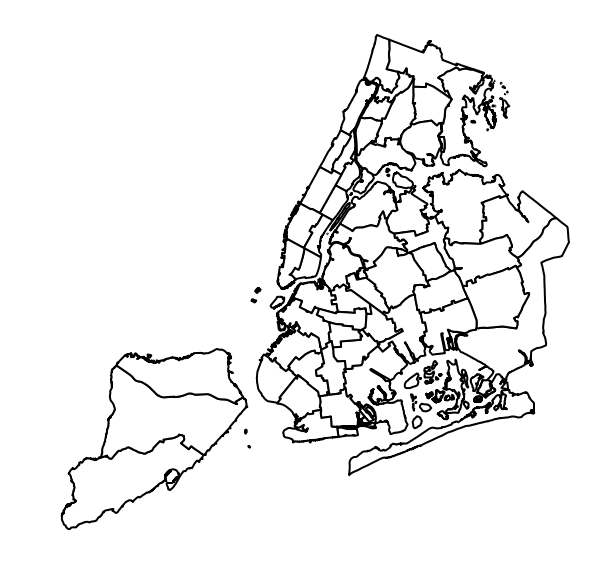

In [27]:
cp.choroplethNYC(pumaSHP, column=None, color="white", edgecolor="black", lw=2);

<center>**Figure 1: Map of NYC Public Use Microdata Areas**<center>

## American Fact Finder data on percentage of houses with broadband internet access

### Get data with American Fact Finder (AFF) API

In [28]:
from censusAPI import myAPI

In [35]:
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)

In [38]:
affkeys = np.array(list(aff1y['variables'].keys()))

In [42]:
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]

[('B28002_004EA',
  'Annotation of Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_004MA',
  'Annotation of Margin of Error!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_007EA',
  'Annotation of Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008EA',
  'Annotation of Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_007MA',
  'Annotation of Margin of Error!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_008MA',
  'Annotation of Margin of Error!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription'),
 ('B28002_008M',
  'Margin of Error!!Total!!With an Internet subs

In [43]:
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

In [44]:
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'concept': 'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int',
 'validValues': []}

root: https://api.census.gov/data/2016/acs/acs1

action: get=[variable Name],NAME

geometry: for=[geometry]:[desired geometry values]in=[larger geometry]:[desired larger geometry values]

API key: key:[api key]

the URL is constructed as root?action&geometry&key


Note that it took me a long time to figure out how to request the right geometry: in the url I write below the geometry is "public%20use%20microdata%20area" where %20 is the character for ' ' (space) in a url, and ":*" means all PUMAS
state:36 is New York State

In [47]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


In [48]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPI
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,40479,"St. Lawrence County PUMA, New York",36,100,NaN
1,67092,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN
2,51614,"Warren & Washington Counties PUMA, New York",36,300,NaN
3,44300,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN
4,61146,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN


### Generate a feature for the percentage of households with broadband access

In [50]:
pumaBB['numberHouseholds'] = pumaPP.B28002_001E
pumaBB['percentBB'] = pumaBB.B28002_004E / pumaBB.numberHouseholds

In [52]:
pumaBB.head()

,B28002_004E,NAME,state,public use microdata area,Unnamed: 4,numberHouseholds,percentBB
0,32607,"St. Lawrence County PUMA, New York",36,100,NaN,40479,0.805529
1,50811,"Clinton, Franklin, Essex & Hamilton Counties P...",36,200,NaN,67092,0.757333
2,41210,"Warren & Washington Counties PUMA, New York",36,300,NaN,51614,0.798427
3,36075,Herkimer (North & Central) & Oneida (Outer) Co...,36,401,NaN,44300,0.814334
4,47786,Oneida County (Central)--Greater Utica & Rome ...,36,402,NaN,61146,0.781507


### Compare it with the AFF published "Percentage of households with broadband access"

## ASH Score 30. Extra Credit 0